In [ ]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from myFunctions import install_packages, save_table 
install_packages()
from tabulate import tabulate
import pandas as pd
import numpy as np
import warnings
import re
import matplotlib.pyplot as plt
import seaborn as sns



from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)


In [257]:

### folders 
input_dir_processed = os.path.join('..', 'data', 'processed')
input_dir_features = os.path.join('..', 'data', 'features')

In [260]:
df_timestamp_path = os.path.join(input_dir_processed, 'df_timestamp.parquet')
df_timestamp_features_path = os.path.join(input_dir_features, 'features.parquet')

In [261]:
df_features = pd.read_parquet(df_timestamp_features_path)


In [263]:
df_features.set_index('time', inplace=	True, drop=True)

In [232]:
df_timestamp = pd.read_parquet(df_timestamp_path)

# Colunas y definidas
y_cols = 'close_BGI$'

# Padrão regex para x_cols
x_cols_pattern = re.compile(r'^(close_).*')

# Filtrar colunas que correspondem ao padrão e não estão em y_cols
x_cols = [
    col for col in df_timestamp.columns
    if x_cols_pattern.match(col) and col not in y_cols
]




In [ ]:
df_timestamp.head()

In [ ]:
df_close = df_timestamp[['time']+ y_cols+ x_cols]

In [265]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")


# Inicializar o MinMaxScaler
scaler = MinMaxScaler()

# Copiar o DataFrame e aplicar MinMaxScaler nas colunas de 'close'
df_scaled = df_close.copy()
for col in df_close.columns:
    if 'close' in col:
        df_scaled[col] = scaler.fit_transform(df_close[[col]])

# Definir as colunas para os gráficos

In [266]:
df_scaled

time  close_BGI$  close_AGFS  close_CCM$  close_DI1$  \
0     2022-06-02 09:00:00    0.763272    0.924893    0.911085    0.454653   
1     2022-06-02 09:15:00    0.756620    0.924893    0.916123    0.455600   
2     2022-06-02 09:30:00    0.756620    0.924893    0.911826    0.448260   
3     2022-06-02 09:45:00    0.756940    0.924893    0.903823    0.448260   
4     2022-06-02 10:00:00    0.761993    0.954936    0.905009    0.446128   
...                   ...         ...         ...         ...         ...   
22350 2024-11-22 16:30:00    1.000000    0.633047    0.171162    0.872366   
22351 2024-11-22 16:45:00    1.000000    0.633047    0.171162    0.873550   
22352 2024-11-22 17:00:00    1.000000    0.626609    0.171162    0.874734   
22353 2024-11-22 17:15:00    1.000000    0.626609    0.171162    0.874734   
22354 2024-11-22 17:30:00    1.000000    0.639485    0.171162    0.872366   

       close_DOL$  close_GOLD11  close_IBOV  close_ICF$  close_ICON  \
0        0.440433      0.077874    0.380428    0.447619    0.800318   
1        0.432518      0.077874    0.380428    0.444803    0.800318   
2        0.421525      0.077874    0.380428    0.460541    0.800318   
3        0.423724      0.077874    0.380428    0.454311    0.800318   
4        0.430319      0.076638    0.402413    0.453895    0.825776   
...           ...           ...         ...         ...         ...   
22350    0.634171      0.951792    0.792715    0.998154    0.233890   
22351    0.635702      0.951792    0.790811    0.998154    0.233095   
22352    0.635702      0.950556    0.788456    0.998154    0.229912   
22353    0.634554      0.949320    0.790097    0.998154    0.231504   
22354    0.631875      0.948084    0.797069    0.998154    0.238663   

       close_IFIX  close_IND$  close_IVVB11  close_price_target  
0        0.129870    0.869583      0.063257            0.756620  
1        0.129870    0.871066      0.063257            0.756620  
2        0.129870    0.874955      0.063257            0.756940  
3        0.129870    0.877724      0.063257            0.761993  
4        0.134199    0.882172      0.057043            0.764488  
...           ...         ...           ...                 ...  
22350    0.636364    0.386634      0.976754            1.000000  
22351    0.637807    0.384788      0.978629            1.000000  
22352    0.636364    0.382354      0.976058            1.000000  
22353    0.636364    0.384200      0.977558            1.000000  
22354    0.636364    0.396145      0.976540            1.000000  

[22355 rows x 14 columns]

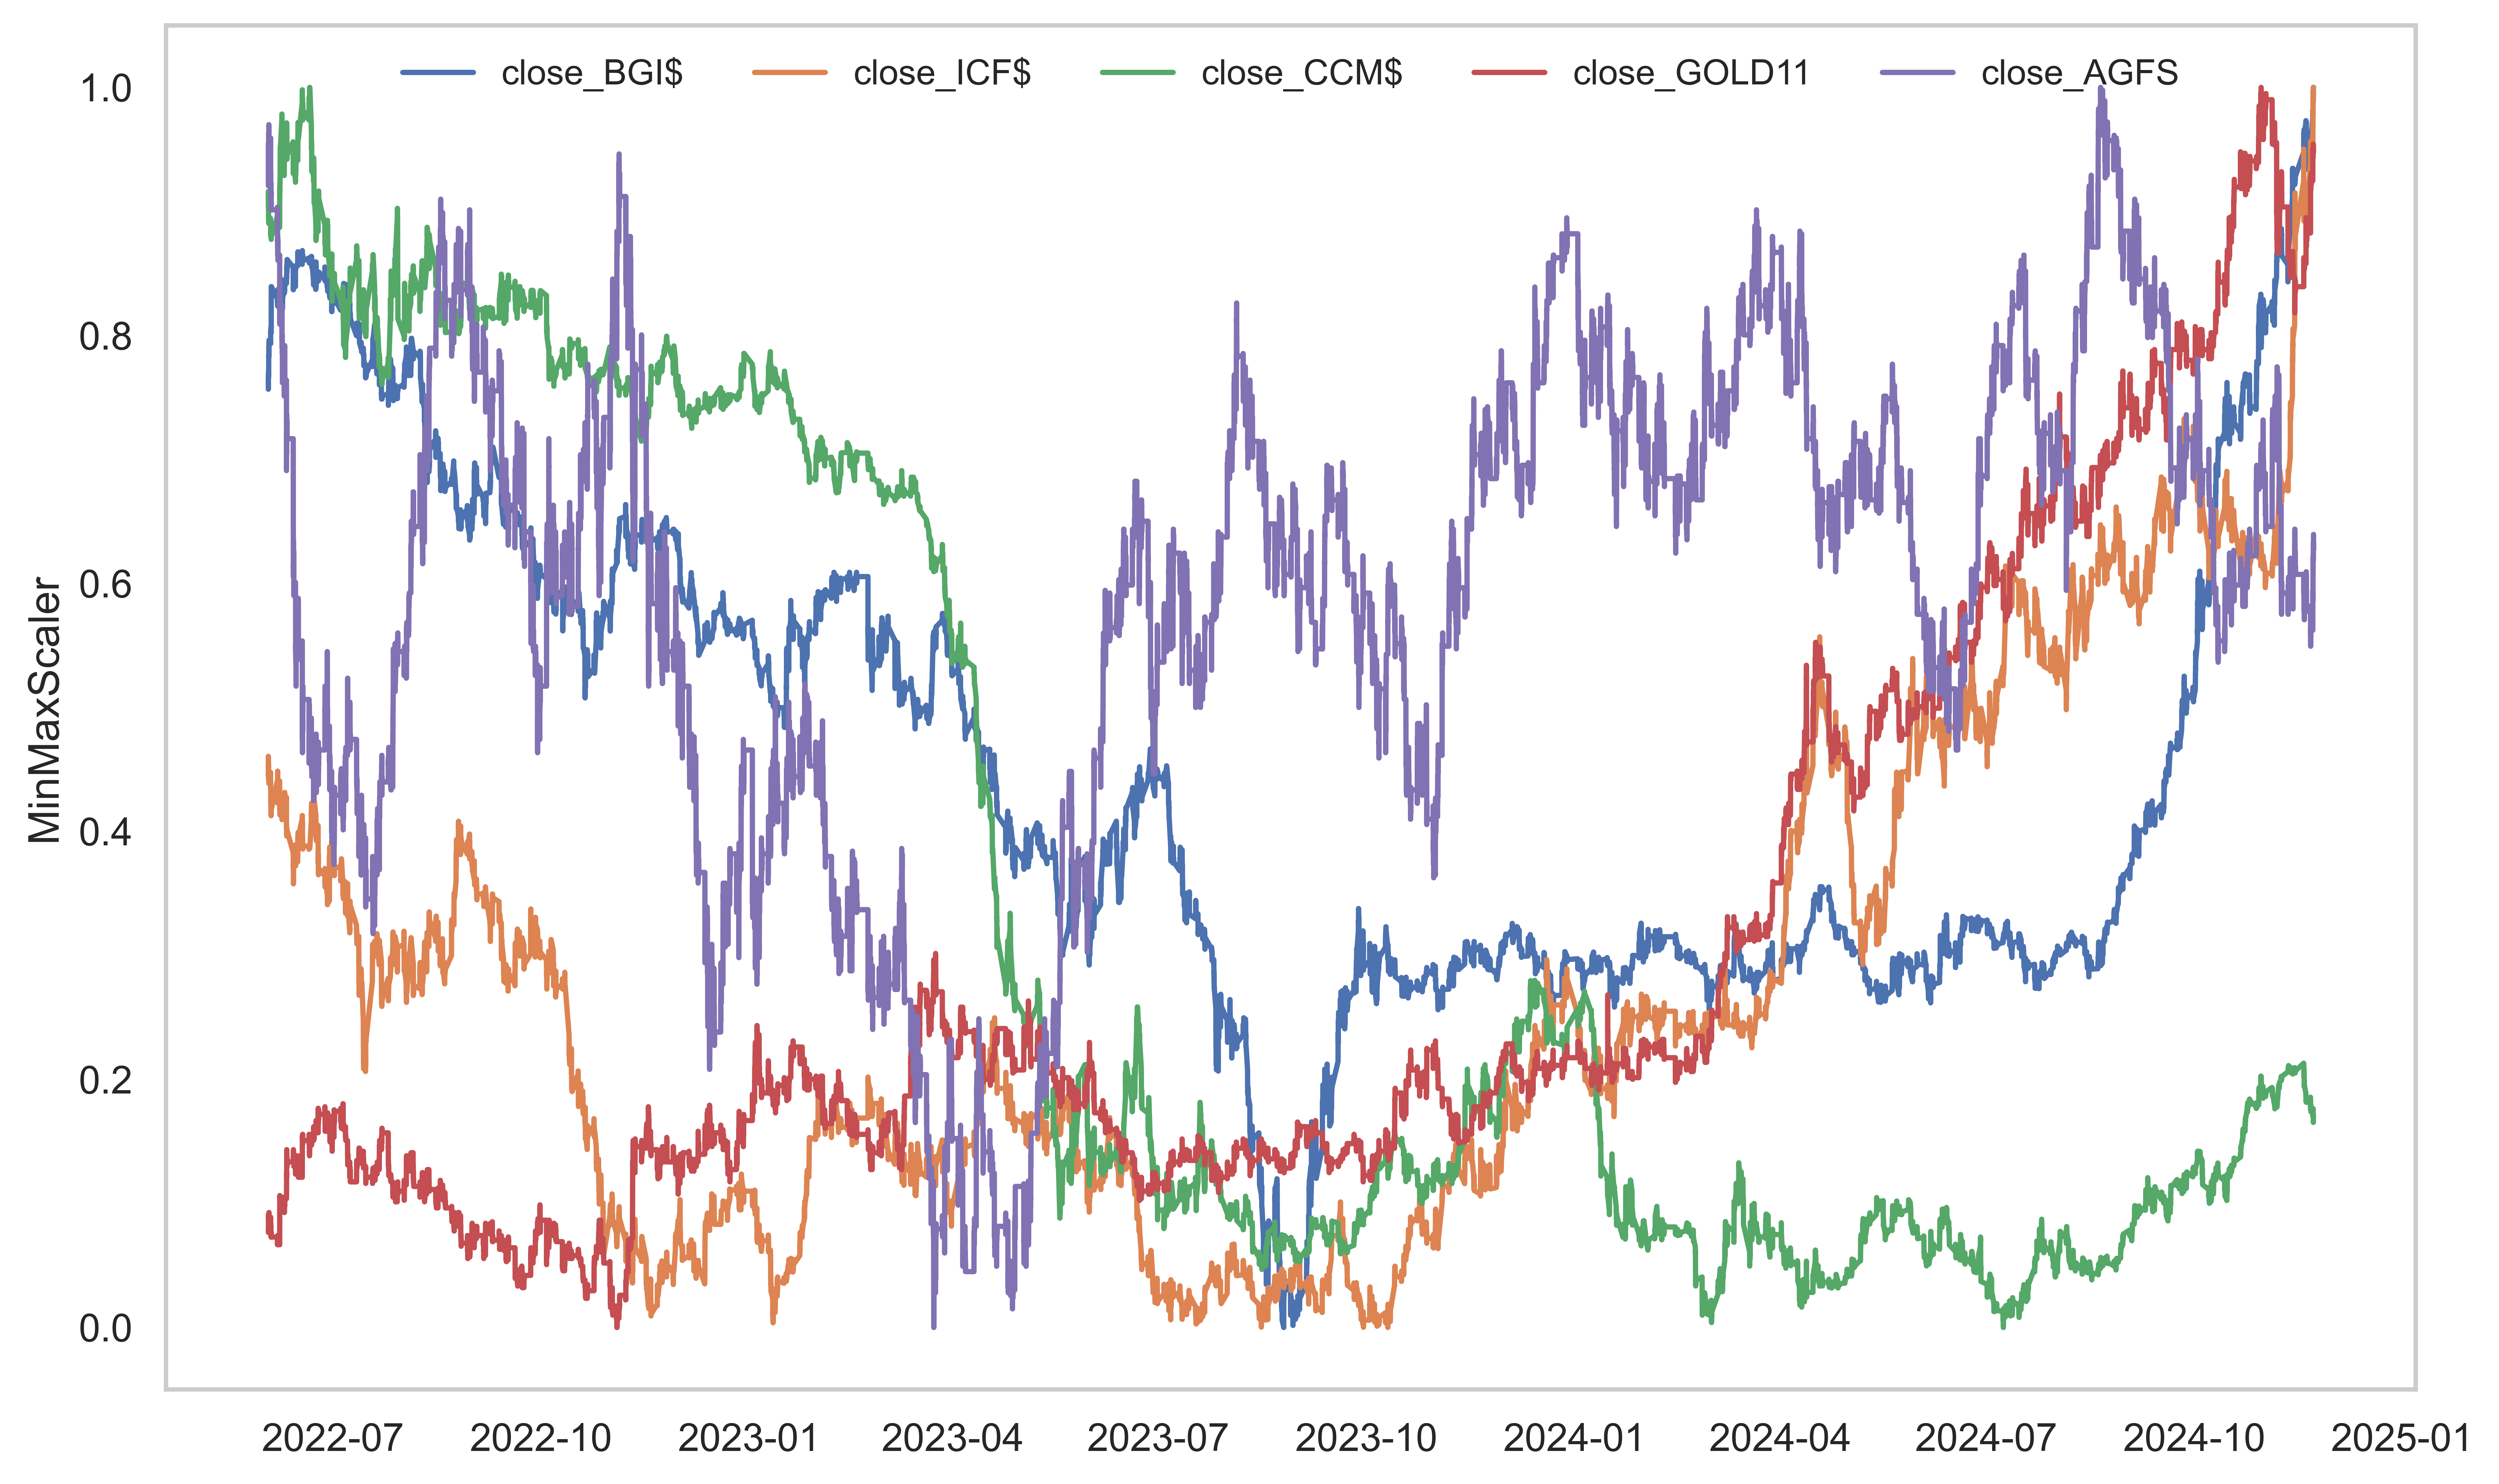

In [269]:
# Definir o estilo do gráfico
sns.set(style="whitegrid")

group_1_cols = ['close_BGI$', 'close_ICF$', 'close_CCM$', 'close_GOLD11', 'close_AGFS']

# Gráfico para o grupo 1
plt.figure(figsize=(10, 6), dpi=900)  # Aumentando a resolução e o tamanho
for col in group_1_cols:
    plt.plot(df_scaled.time, df_scaled[col], label=col)

plt.ylabel('MinMaxScaler', fontsize=12)
plt.grid(False)
# Colocar a legenda na parte inferior
plt.legend(

    bbox_to_anchor=(0.5, 1),  # Posicionar abaixo
    loc='upper center',
    ncol=5,  # Distribuir em 4 colunas
    fontsize=10,
   
    frameon=False
)
plt.tight_layout()
plt.show()


In [22]:
def adfuller_test(df, critical_level='5%'):
    # Check if the critical level is valid
    if critical_level not in ['1%', '5%', '10%']:
        raise ValueError("The critical_level parameter must be one of: '1%', '5%', or '10%'")

    non_stationary = []  # List to store non-stationary variables
    result_df = pd.DataFrame(columns=['Variable', 'ADF Statistic', 'p-value', '1%', '5%', '10%', 'res'])

    # Loop through each column (variable)
    for col in df.columns:
        result = adfuller(df[col].values)
        adf_stat = result[0]
        p_value = result[1]
        critical_vals = result[4]

        # Compare the ADF statistic with the selected critical value
        is_stationary = 1 if adf_stat < critical_vals[critical_level] else 0

        # Append to the non_stationary list if not stationary
        if is_stationary == 0:
            non_stationary.append(col)
        
        # Collect results for each variable
        row = {
            'Variable': col,
            'ADF Statistic': adf_stat,
            'p-value': p_value,
            '1%': critical_vals['1%'],
            '5%': critical_vals['5%'],
            '10%': critical_vals['10%'],
            'res': is_stationary  # 1 for Stationary, 0 for Non-Stationary
        }
        print(row)
        # Append row to result_df
        result_df = pd.concat([result_df, pd.DataFrame([row])], ignore_index=True)

    # Return non_stationary variables and result_df
    return non_stationary, result_df

In [38]:
def make_stationary(df: pd.DataFrame(), 
                    max_diffs: int = 5):
    """
    Make the given dataframe stationary by applying differencing.

    Args:
        df (pd.DataFrame): DataFrame containing time series data.
        max_diffs (int): Maximum number of differencing iterations to perform.

    Returns:
        pd.DataFrame: DataFrame with columns showing the stationarity status after each differencing iteration.
    """

    diff_df = df.copy()
    result_df = pd.DataFrame(index=df.columns)  # Start with columns as index for results
    stationary_set = set()
    diff_counts = {col: 0 for col in df.columns}  # Track number of differencing for each column

    for i in range(max_diffs):
        # Perform differencing only if it's not the first iteration
        if i != 0:
            diff_df = diff_df.diff()
            diff_df.dropna(inplace=True)
        
        non_stationary_cols, current_result_df = adfuller_test(diff_df)
        
        # Update stationary columns
        stationary_set.update([col for col in df.columns if col not in non_stationary_cols])
        
        # Track how many times each column needed differencing
        for col in df.columns:
            if col in stationary_set:
                diff_counts[col] = i  # Mark the number of differences for stationary columns

        # If all columns are stationary, break the loop
        if len(stationary_set) == len(df.columns):
            break
        
        # Only keep non-stationary columns for the next iteration
        diff_df = diff_df[non_stationary_cols]

    # Update result_df with diff_counts
    result_df['diff'] = result_df.index.map(diff_counts)
    
    return result_df


In [235]:
from itertools import combinations
import pandas as pd
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def sliced_johansen_cointegration_test(df, y_var, coint_vars, window_size=30, max_cols=3, det_order=-1, k_ar_diff=0, critical_level="5%"):
    """
    Perform Johansen Cointegration Test for different combinations of variables in a rolling window.
    
    Parameters:
    ----------
    df : pd.DataFrame
        DataFrame containing the time series data.
    y_var : str
        The name of the dependent variable in the DataFrame to be tested for cointegration.
    coint_vars : list of str
        A list of other variable names to be tested for cointegration with `y_var`.
    max_cols : int, optional, default=2
        The maximum number of columns to combine with `y_var` (pairs, trios, etc.).
    det_order : int, optional, default=-1
        The deterministic trend assumption in the Johansen test (-1 for no trend).
    k_ar_diff : int, optional, default=0
        The number of lags to use in the differenced series.
    critical_level : str, optional, default="5%"
        The critical level to use for determining cointegration. Must be '1%', '5%' or '10%'.
    window_size : int, optional, default=10
        The size of the rolling window to apply the cointegration test over.
        
    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the results of the cointegration tests for each rolling window.
        Includes cointegration test results, rankings, and eigenvalues for each combination of variables tested.
    """
    
    # Map critical level to index for accessing critical values
    col = {'1%': 0, '5%': 1, '10%': 2}.get(critical_level)
    if col is None:
        raise ValueError("Critical level must be '1%', '5%' or '10%'.")

    comb_vars = [list(combinations(coint_vars, i)) for i in range(1, max_cols + 1)]
    combined_columns = []
    for comb_set in comb_vars:
        for comb in comb_set:
            combined_columns.append((y_var, *comb))

    # List to accumulate results
    all_results = []

    # Iterate over rolling windows of data
    for start in range(0, len(df) - window_size + 1, window_size):
        window_data = df.iloc[start:start + window_size]
        start_date = window_data.index.min()
        end_date = window_data.index.max()
        print(f'Checking coint for between {start_date} and {end_date}')

        # Perform cointegration test for each combination of variables
        for comb in combined_columns:
            data = df[list(comb)]  # Use the correct combination to select the data
            johansen_result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff
            # Extract results from the Johansen test
            eigenvalues = johansen_result.eig
            trace_stats = johansen_result.lr1
            max_eigen_stats = johansen_result.lr2
            trace_critical_vals = johansen_result.cvt
            max_eigen_critical_vals = johansen_result.cvm

            # Determine cointegration and rankings
            trace_cointegration = int(any(trace_stats[i] >= trace_critical_vals[i][col] for i in range(len(trace_stats))))
            max_eigen_cointegration = int(any(max_eigen_stats[i] >= max_eigen_critical_vals[i][col] for i in range(len(max_eigen_stats))))
            
            result = {
                "Start Date": start_date,
                "End Date": end_date,
                "Cointegrated Variables": ', '.join(str(var) for var in comb),
                "Cointegration (Trace)": trace_cointegration,
                "Ranking (Trace)": sum(trace_stats[i] >= trace_critical_vals[i][col] for i in range(len(trace_stats))),
                "Cointegration (Max Eigenvalue)": max_eigen_cointegration,
                "Ranking (Max Eigenvalue)": sum(max_eigen_stats[i] >= max_eigen_critical_vals[i][col] for i in range(len(max_eigen_stats))),
                "Eigenvalues": eigenvalues
            }
            all_results.append(result)

    # Return the DataFrame with the results for all rolling windows
    return pd.DataFrame(all_results)



In [236]:
coint_df = sliced_johansen_cointegration_test(df_scaled, y_var= y_cols, 
                                       coint_vars=x_cols,
                                       max_cols = 2,
                                       window_size=1080)
coint_df.sort_values(by='Cointegrated Variables').head(50)

Checking coint for between 2022-06-02 09:00:00 and 2022-07-14 17:45:00


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2022-07-15 09:00:00 and 2022-08-25 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2022-08-26 09:00:00 and 2022-10-07 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2022-10-10 09:00:00 and 2022-11-23 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2022-11-24 09:00:00 and 2023-01-05 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-01-06 09:00:00 and 2023-02-16 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-02-17 09:00:00 and 2023-04-03 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-04-04 09:00:00 and 2023-05-18 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]


Checking coint for between 2023-05-19 09:00:00 and 2023-06-30 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-07-03 09:00:00 and 2023-08-11 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-08-14 09:00:00 and 2023-09-25 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-09-26 09:00:00 and 2023-11-08 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2023-11-09 09:00:00 and 2023-12-21 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


Checking coint for between 2023-12-22 09:00:00 and 2024-02-06 17:45:00


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-02-07 09:00:00 and 2024-03-21 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-03-22 09:00:00 and 2024-05-06 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-05-07 09:00:00 and 2024-06-18 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-06-19 09:00:00 and 2024-07-30 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-07-31 09:00:00 and 2024-09-10 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

Checking coint for between 2024-09-11 09:00:00 and 2024-10-22 17:45:00


c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS')

close_BGI$  close_AGFS
time                                       
2022-06-02 09:00:00    0.763272    0.924893
2022-06-02 09:15:00    0.756620    0.924893
2022-06-02 09:30:00    0.756620    0.924893
2022-06-02 09:45:00    0.756940    0.924893
2022-06-02 10:00:00    0.761993    0.954936

('close_BGI$', 'close_CCM$')

close_BGI$  close_CCM$
time                                       
2022-06-02 09:00:00    0.763272    0.911085
2022-06-02 09:15:00    0.756620    0.916123
2022-06-02 09:30:00    0.756620    0.911826
2022-06-02 09:45:00    0.756940    0.903823
2022-06-02 10:00:00    0.761993    0.905009

('close_BGI$', 'close_DI1$')

close_BGI$  close_DI1$
time                                       
2022-06-02 09:00:00    0.763272    0.454653
2022-06-02 09:15:00    0.756620    0.455600
2022-06-02 09:30:00    0.756620    0.448260
2022-06-02 09:45:00    0.756940    0.448260
2022-06-02 10:00:00    0.761993    0.446128

('close_BGI$', 'close_DOL$')

close_BGI$  close_DOL$
time                                       
2022-06-02 09:00:00    0.763272    0.440433
2022-06-02 09:15:00    0.756620    0.432518
2022-06-02 09:30:00    0.756620    0.421525
2022-06-02 09:45:00    0.756940    0.423724
2022-06-02 10:00:00    0.761993    0.430319

('close_BGI$', 'close_GOLD11')

close_BGI$  close_GOLD11
time                                         
2022-06-02 09:00:00    0.763272      0.077874
2022-06-02 09:15:00    0.756620      0.077874
2022-06-02 09:30:00    0.756620      0.077874
2022-06-02 09:45:00    0.756940      0.077874
2022-06-02 10:00:00    0.761993      0.076638

('close_BGI$', 'close_IBOV')

close_BGI$  close_IBOV
time                                       
2022-06-02 09:00:00    0.763272    0.380428
2022-06-02 09:15:00    0.756620    0.380428
2022-06-02 09:30:00    0.756620    0.380428
2022-06-02 09:45:00    0.756940    0.380428
2022-06-02 10:00:00    0.761993    0.402413

('close_BGI$', 'close_ICF$')

close_BGI$  close_ICF$
time                                       
2022-06-02 09:00:00    0.763272    0.447619
2022-06-02 09:15:00    0.756620    0.444803
2022-06-02 09:30:00    0.756620    0.460541
2022-06-02 09:45:00    0.756940    0.454311
2022-06-02 10:00:00    0.761993    0.453895

('close_BGI$', 'close_ICON')

close_BGI$  close_ICON
time                                       
2022-06-02 09:00:00    0.763272    0.800318
2022-06-02 09:15:00    0.756620    0.800318
2022-06-02 09:30:00    0.756620    0.800318
2022-06-02 09:45:00    0.756940    0.800318
2022-06-02 10:00:00    0.761993    0.825776

('close_BGI$', 'close_IFIX')

close_BGI$  close_IFIX
time                                       
2022-06-02 09:00:00    0.763272    0.129870
2022-06-02 09:15:00    0.756620    0.129870
2022-06-02 09:30:00    0.756620    0.129870
2022-06-02 09:45:00    0.756940    0.129870
2022-06-02 10:00:00    0.761993    0.134199

('close_BGI$', 'close_IND$')

close_BGI$  close_IND$
time                                       
2022-06-02 09:00:00    0.763272    0.869583
2022-06-02 09:15:00    0.756620    0.871066
2022-06-02 09:30:00    0.756620    0.874955
2022-06-02 09:45:00    0.756940    0.877724
2022-06-02 10:00:00    0.761993    0.882172

('close_BGI$', 'close_IVVB11')

close_BGI$  close_IVVB11
time                                         
2022-06-02 09:00:00    0.763272      0.063257
2022-06-02 09:15:00    0.756620      0.063257
2022-06-02 09:30:00    0.756620      0.063257
2022-06-02 09:45:00    0.756940      0.063257
2022-06-02 10:00:00    0.761993      0.057043

('close_BGI$', 'close_price_target')

close_BGI$  close_price_target
time                                               
2022-06-02 09:00:00    0.763272            0.756620
2022-06-02 09:15:00    0.756620            0.756620
2022-06-02 09:30:00    0.756620            0.756940
2022-06-02 09:45:00    0.756940            0.761993
2022-06-02 10:00:00    0.761993            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_AGFS', 'close_CCM$')

close_BGI$  close_AGFS  close_CCM$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.911085
2022-06-02 09:15:00    0.756620    0.924893    0.916123
2022-06-02 09:30:00    0.756620    0.924893    0.911826
2022-06-02 09:45:00    0.756940    0.924893    0.903823
2022-06-02 10:00:00    0.761993    0.954936    0.905009

('close_BGI$', 'close_AGFS', 'close_DI1$')

close_BGI$  close_AGFS  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.454653
2022-06-02 09:15:00    0.756620    0.924893    0.455600
2022-06-02 09:30:00    0.756620    0.924893    0.448260
2022-06-02 09:45:00    0.756940    0.924893    0.448260
2022-06-02 10:00:00    0.761993    0.954936    0.446128

('close_BGI$', 'close_AGFS', 'close_DOL$')

close_BGI$  close_AGFS  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.440433
2022-06-02 09:15:00    0.756620    0.924893    0.432518
2022-06-02 09:30:00    0.756620    0.924893    0.421525
2022-06-02 09:45:00    0.756940    0.924893    0.423724
2022-06-02 10:00:00    0.761993    0.954936    0.430319

('close_BGI$', 'close_AGFS', 'close_GOLD11')

close_BGI$  close_AGFS  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.077874
2022-06-02 09:15:00    0.756620    0.924893      0.077874
2022-06-02 09:30:00    0.756620    0.924893      0.077874
2022-06-02 09:45:00    0.756940    0.924893      0.077874
2022-06-02 10:00:00    0.761993    0.954936      0.076638

('close_BGI$', 'close_AGFS', 'close_IBOV')

close_BGI$  close_AGFS  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.380428
2022-06-02 09:15:00    0.756620    0.924893    0.380428
2022-06-02 09:30:00    0.756620    0.924893    0.380428
2022-06-02 09:45:00    0.756940    0.924893    0.380428
2022-06-02 10:00:00    0.761993    0.954936    0.402413

('close_BGI$', 'close_AGFS', 'close_ICF$')

close_BGI$  close_AGFS  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.447619
2022-06-02 09:15:00    0.756620    0.924893    0.444803
2022-06-02 09:30:00    0.756620    0.924893    0.460541
2022-06-02 09:45:00    0.756940    0.924893    0.454311
2022-06-02 10:00:00    0.761993    0.954936    0.453895

('close_BGI$', 'close_AGFS', 'close_ICON')

close_BGI$  close_AGFS  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.800318
2022-06-02 09:15:00    0.756620    0.924893    0.800318
2022-06-02 09:30:00    0.756620    0.924893    0.800318
2022-06-02 09:45:00    0.756940    0.924893    0.800318
2022-06-02 10:00:00    0.761993    0.954936    0.825776

('close_BGI$', 'close_AGFS', 'close_IFIX')

close_BGI$  close_AGFS  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.129870
2022-06-02 09:15:00    0.756620    0.924893    0.129870
2022-06-02 09:30:00    0.756620    0.924893    0.129870
2022-06-02 09:45:00    0.756940    0.924893    0.129870
2022-06-02 10:00:00    0.761993    0.954936    0.134199

('close_BGI$', 'close_AGFS', 'close_IND$')

close_BGI$  close_AGFS  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.924893    0.869583
2022-06-02 09:15:00    0.756620    0.924893    0.871066
2022-06-02 09:30:00    0.756620    0.924893    0.874955
2022-06-02 09:45:00    0.756940    0.924893    0.877724
2022-06-02 10:00:00    0.761993    0.954936    0.882172

('close_BGI$', 'close_AGFS', 'close_IVVB11')

close_BGI$  close_AGFS  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.924893      0.063257
2022-06-02 09:15:00    0.756620    0.924893      0.063257
2022-06-02 09:30:00    0.756620    0.924893      0.063257
2022-06-02 09:45:00    0.756940    0.924893      0.063257
2022-06-02 10:00:00    0.761993    0.954936      0.057043

('close_BGI$', 'close_AGFS', 'close_price_target')

close_BGI$  close_AGFS  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.924893            0.756620
2022-06-02 09:15:00    0.756620    0.924893            0.756620
2022-06-02 09:30:00    0.756620    0.924893            0.756940
2022-06-02 09:45:00    0.756940    0.924893            0.761993
2022-06-02 10:00:00    0.761993    0.954936            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_CCM$', 'close_DI1$')

close_BGI$  close_CCM$  close_DI1$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.454653
2022-06-02 09:15:00    0.756620    0.916123    0.455600
2022-06-02 09:30:00    0.756620    0.911826    0.448260
2022-06-02 09:45:00    0.756940    0.903823    0.448260
2022-06-02 10:00:00    0.761993    0.905009    0.446128

('close_BGI$', 'close_CCM$', 'close_DOL$')

close_BGI$  close_CCM$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.440433
2022-06-02 09:15:00    0.756620    0.916123    0.432518
2022-06-02 09:30:00    0.756620    0.911826    0.421525
2022-06-02 09:45:00    0.756940    0.903823    0.423724
2022-06-02 10:00:00    0.761993    0.905009    0.430319

('close_BGI$', 'close_CCM$', 'close_GOLD11')

close_BGI$  close_CCM$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.077874
2022-06-02 09:15:00    0.756620    0.916123      0.077874
2022-06-02 09:30:00    0.756620    0.911826      0.077874
2022-06-02 09:45:00    0.756940    0.903823      0.077874
2022-06-02 10:00:00    0.761993    0.905009      0.076638

('close_BGI$', 'close_CCM$', 'close_IBOV')

close_BGI$  close_CCM$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.380428
2022-06-02 09:15:00    0.756620    0.916123    0.380428
2022-06-02 09:30:00    0.756620    0.911826    0.380428
2022-06-02 09:45:00    0.756940    0.903823    0.380428
2022-06-02 10:00:00    0.761993    0.905009    0.402413

('close_BGI$', 'close_CCM$', 'close_ICF$')

close_BGI$  close_CCM$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.447619
2022-06-02 09:15:00    0.756620    0.916123    0.444803
2022-06-02 09:30:00    0.756620    0.911826    0.460541
2022-06-02 09:45:00    0.756940    0.903823    0.454311
2022-06-02 10:00:00    0.761993    0.905009    0.453895

('close_BGI$', 'close_CCM$', 'close_ICON')

close_BGI$  close_CCM$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.800318
2022-06-02 09:15:00    0.756620    0.916123    0.800318
2022-06-02 09:30:00    0.756620    0.911826    0.800318
2022-06-02 09:45:00    0.756940    0.903823    0.800318
2022-06-02 10:00:00    0.761993    0.905009    0.825776

('close_BGI$', 'close_CCM$', 'close_IFIX')

close_BGI$  close_CCM$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.129870
2022-06-02 09:15:00    0.756620    0.916123    0.129870
2022-06-02 09:30:00    0.756620    0.911826    0.129870
2022-06-02 09:45:00    0.756940    0.903823    0.129870
2022-06-02 10:00:00    0.761993    0.905009    0.134199

('close_BGI$', 'close_CCM$', 'close_IND$')

close_BGI$  close_CCM$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.911085    0.869583
2022-06-02 09:15:00    0.756620    0.916123    0.871066
2022-06-02 09:30:00    0.756620    0.911826    0.874955
2022-06-02 09:45:00    0.756940    0.903823    0.877724
2022-06-02 10:00:00    0.761993    0.905009    0.882172

('close_BGI$', 'close_CCM$', 'close_IVVB11')

close_BGI$  close_CCM$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.911085      0.063257
2022-06-02 09:15:00    0.756620    0.916123      0.063257
2022-06-02 09:30:00    0.756620    0.911826      0.063257
2022-06-02 09:45:00    0.756940    0.903823      0.063257
2022-06-02 10:00:00    0.761993    0.905009      0.057043

('close_BGI$', 'close_CCM$', 'close_price_target')

close_BGI$  close_CCM$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.911085            0.756620
2022-06-02 09:15:00    0.756620    0.916123            0.756620
2022-06-02 09:30:00    0.756620    0.911826            0.756940
2022-06-02 09:45:00    0.756940    0.903823            0.761993
2022-06-02 10:00:00    0.761993    0.905009            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DI1$', 'close_DOL$')

close_BGI$  close_DI1$  close_DOL$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.440433
2022-06-02 09:15:00    0.756620    0.455600    0.432518
2022-06-02 09:30:00    0.756620    0.448260    0.421525
2022-06-02 09:45:00    0.756940    0.448260    0.423724
2022-06-02 10:00:00    0.761993    0.446128    0.430319

('close_BGI$', 'close_DI1$', 'close_GOLD11')

close_BGI$  close_DI1$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.077874
2022-06-02 09:15:00    0.756620    0.455600      0.077874
2022-06-02 09:30:00    0.756620    0.448260      0.077874
2022-06-02 09:45:00    0.756940    0.448260      0.077874
2022-06-02 10:00:00    0.761993    0.446128      0.076638

('close_BGI$', 'close_DI1$', 'close_IBOV')

close_BGI$  close_DI1$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.380428
2022-06-02 09:15:00    0.756620    0.455600    0.380428
2022-06-02 09:30:00    0.756620    0.448260    0.380428
2022-06-02 09:45:00    0.756940    0.448260    0.380428
2022-06-02 10:00:00    0.761993    0.446128    0.402413

('close_BGI$', 'close_DI1$', 'close_ICF$')

close_BGI$  close_DI1$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.447619
2022-06-02 09:15:00    0.756620    0.455600    0.444803
2022-06-02 09:30:00    0.756620    0.448260    0.460541
2022-06-02 09:45:00    0.756940    0.448260    0.454311
2022-06-02 10:00:00    0.761993    0.446128    0.453895

('close_BGI$', 'close_DI1$', 'close_ICON')

close_BGI$  close_DI1$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.800318
2022-06-02 09:15:00    0.756620    0.455600    0.800318
2022-06-02 09:30:00    0.756620    0.448260    0.800318
2022-06-02 09:45:00    0.756940    0.448260    0.800318
2022-06-02 10:00:00    0.761993    0.446128    0.825776

('close_BGI$', 'close_DI1$', 'close_IFIX')

close_BGI$  close_DI1$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.129870
2022-06-02 09:15:00    0.756620    0.455600    0.129870
2022-06-02 09:30:00    0.756620    0.448260    0.129870
2022-06-02 09:45:00    0.756940    0.448260    0.129870
2022-06-02 10:00:00    0.761993    0.446128    0.134199

('close_BGI$', 'close_DI1$', 'close_IND$')

close_BGI$  close_DI1$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.454653    0.869583
2022-06-02 09:15:00    0.756620    0.455600    0.871066
2022-06-02 09:30:00    0.756620    0.448260    0.874955
2022-06-02 09:45:00    0.756940    0.448260    0.877724
2022-06-02 10:00:00    0.761993    0.446128    0.882172

('close_BGI$', 'close_DI1$', 'close_IVVB11')

close_BGI$  close_DI1$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.454653      0.063257
2022-06-02 09:15:00    0.756620    0.455600      0.063257
2022-06-02 09:30:00    0.756620    0.448260      0.063257
2022-06-02 09:45:00    0.756940    0.448260      0.063257
2022-06-02 10:00:00    0.761993    0.446128      0.057043

('close_BGI$', 'close_DI1$', 'close_price_target')

close_BGI$  close_DI1$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.454653            0.756620
2022-06-02 09:15:00    0.756620    0.455600            0.756620
2022-06-02 09:30:00    0.756620    0.448260            0.756940
2022-06-02 09:45:00    0.756940    0.448260            0.761993
2022-06-02 10:00:00    0.761993    0.446128            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_DOL$', 'close_GOLD11')

close_BGI$  close_DOL$  close_GOLD11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.077874
2022-06-02 09:15:00    0.756620    0.432518      0.077874
2022-06-02 09:30:00    0.756620    0.421525      0.077874
2022-06-02 09:45:00    0.756940    0.423724      0.077874
2022-06-02 10:00:00    0.761993    0.430319      0.076638

('close_BGI$', 'close_DOL$', 'close_IBOV')

close_BGI$  close_DOL$  close_IBOV
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.380428
2022-06-02 09:15:00    0.756620    0.432518    0.380428
2022-06-02 09:30:00    0.756620    0.421525    0.380428
2022-06-02 09:45:00    0.756940    0.423724    0.380428
2022-06-02 10:00:00    0.761993    0.430319    0.402413

('close_BGI$', 'close_DOL$', 'close_ICF$')

close_BGI$  close_DOL$  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.447619
2022-06-02 09:15:00    0.756620    0.432518    0.444803
2022-06-02 09:30:00    0.756620    0.421525    0.460541
2022-06-02 09:45:00    0.756940    0.423724    0.454311
2022-06-02 10:00:00    0.761993    0.430319    0.453895

('close_BGI$', 'close_DOL$', 'close_ICON')

close_BGI$  close_DOL$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.800318
2022-06-02 09:15:00    0.756620    0.432518    0.800318
2022-06-02 09:30:00    0.756620    0.421525    0.800318
2022-06-02 09:45:00    0.756940    0.423724    0.800318
2022-06-02 10:00:00    0.761993    0.430319    0.825776

('close_BGI$', 'close_DOL$', 'close_IFIX')

close_BGI$  close_DOL$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.129870
2022-06-02 09:15:00    0.756620    0.432518    0.129870
2022-06-02 09:30:00    0.756620    0.421525    0.129870
2022-06-02 09:45:00    0.756940    0.423724    0.129870
2022-06-02 10:00:00    0.761993    0.430319    0.134199

('close_BGI$', 'close_DOL$', 'close_IND$')

close_BGI$  close_DOL$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.440433    0.869583
2022-06-02 09:15:00    0.756620    0.432518    0.871066
2022-06-02 09:30:00    0.756620    0.421525    0.874955
2022-06-02 09:45:00    0.756940    0.423724    0.877724
2022-06-02 10:00:00    0.761993    0.430319    0.882172

('close_BGI$', 'close_DOL$', 'close_IVVB11')

close_BGI$  close_DOL$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.440433      0.063257
2022-06-02 09:15:00    0.756620    0.432518      0.063257
2022-06-02 09:30:00    0.756620    0.421525      0.063257
2022-06-02 09:45:00    0.756940    0.423724      0.063257
2022-06-02 10:00:00    0.761993    0.430319      0.057043

('close_BGI$', 'close_DOL$', 'close_price_target')

close_BGI$  close_DOL$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.440433            0.756620
2022-06-02 09:15:00    0.756620    0.432518            0.756620
2022-06-02 09:30:00    0.756620    0.421525            0.756940
2022-06-02 09:45:00    0.756940    0.423724            0.761993
2022-06-02 10:00:00    0.761993    0.430319            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_GOLD11', 'close_IBOV')

close_BGI$  close_GOLD11  close_IBOV
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.380428
2022-06-02 09:15:00    0.756620      0.077874    0.380428
2022-06-02 09:30:00    0.756620      0.077874    0.380428
2022-06-02 09:45:00    0.756940      0.077874    0.380428
2022-06-02 10:00:00    0.761993      0.076638    0.402413

('close_BGI$', 'close_GOLD11', 'close_ICF$')

close_BGI$  close_GOLD11  close_ICF$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.447619
2022-06-02 09:15:00    0.756620      0.077874    0.444803
2022-06-02 09:30:00    0.756620      0.077874    0.460541
2022-06-02 09:45:00    0.756940      0.077874    0.454311
2022-06-02 10:00:00    0.761993      0.076638    0.453895

('close_BGI$', 'close_GOLD11', 'close_ICON')

close_BGI$  close_GOLD11  close_ICON
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.800318
2022-06-02 09:15:00    0.756620      0.077874    0.800318
2022-06-02 09:30:00    0.756620      0.077874    0.800318
2022-06-02 09:45:00    0.756940      0.077874    0.800318
2022-06-02 10:00:00    0.761993      0.076638    0.825776

('close_BGI$', 'close_GOLD11', 'close_IFIX')

close_BGI$  close_GOLD11  close_IFIX
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.129870
2022-06-02 09:15:00    0.756620      0.077874    0.129870
2022-06-02 09:30:00    0.756620      0.077874    0.129870
2022-06-02 09:45:00    0.756940      0.077874    0.129870
2022-06-02 10:00:00    0.761993      0.076638    0.134199

('close_BGI$', 'close_GOLD11', 'close_IND$')

close_BGI$  close_GOLD11  close_IND$
time                                                     
2022-06-02 09:00:00    0.763272      0.077874    0.869583
2022-06-02 09:15:00    0.756620      0.077874    0.871066
2022-06-02 09:30:00    0.756620      0.077874    0.874955
2022-06-02 09:45:00    0.756940      0.077874    0.877724
2022-06-02 10:00:00    0.761993      0.076638    0.882172

('close_BGI$', 'close_GOLD11', 'close_IVVB11')

close_BGI$  close_GOLD11  close_IVVB11
time                                                       
2022-06-02 09:00:00    0.763272      0.077874      0.063257
2022-06-02 09:15:00    0.756620      0.077874      0.063257
2022-06-02 09:30:00    0.756620      0.077874      0.063257
2022-06-02 09:45:00    0.756940      0.077874      0.063257
2022-06-02 10:00:00    0.761993      0.076638      0.057043

('close_BGI$', 'close_GOLD11', 'close_price_target')

close_BGI$  close_GOLD11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.077874            0.756620
2022-06-02 09:15:00    0.756620      0.077874            0.756620
2022-06-02 09:30:00    0.756620      0.077874            0.756940
2022-06-02 09:45:00    0.756940      0.077874            0.761993
2022-06-02 10:00:00    0.761993      0.076638            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IBOV', 'close_ICF$')

close_BGI$  close_IBOV  close_ICF$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.447619
2022-06-02 09:15:00    0.756620    0.380428    0.444803
2022-06-02 09:30:00    0.756620    0.380428    0.460541
2022-06-02 09:45:00    0.756940    0.380428    0.454311
2022-06-02 10:00:00    0.761993    0.402413    0.453895

('close_BGI$', 'close_IBOV', 'close_ICON')

close_BGI$  close_IBOV  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.800318
2022-06-02 09:15:00    0.756620    0.380428    0.800318
2022-06-02 09:30:00    0.756620    0.380428    0.800318
2022-06-02 09:45:00    0.756940    0.380428    0.800318
2022-06-02 10:00:00    0.761993    0.402413    0.825776

('close_BGI$', 'close_IBOV', 'close_IFIX')

close_BGI$  close_IBOV  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.129870
2022-06-02 09:15:00    0.756620    0.380428    0.129870
2022-06-02 09:30:00    0.756620    0.380428    0.129870
2022-06-02 09:45:00    0.756940    0.380428    0.129870
2022-06-02 10:00:00    0.761993    0.402413    0.134199

('close_BGI$', 'close_IBOV', 'close_IND$')

close_BGI$  close_IBOV  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.380428    0.869583
2022-06-02 09:15:00    0.756620    0.380428    0.871066
2022-06-02 09:30:00    0.756620    0.380428    0.874955
2022-06-02 09:45:00    0.756940    0.380428    0.877724
2022-06-02 10:00:00    0.761993    0.402413    0.882172

('close_BGI$', 'close_IBOV', 'close_IVVB11')

close_BGI$  close_IBOV  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.380428      0.063257
2022-06-02 09:15:00    0.756620    0.380428      0.063257
2022-06-02 09:30:00    0.756620    0.380428      0.063257
2022-06-02 09:45:00    0.756940    0.380428      0.063257
2022-06-02 10:00:00    0.761993    0.402413      0.057043

('close_BGI$', 'close_IBOV', 'close_price_target')

close_BGI$  close_IBOV  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.380428            0.756620
2022-06-02 09:15:00    0.756620    0.380428            0.756620
2022-06-02 09:30:00    0.756620    0.380428            0.756940
2022-06-02 09:45:00    0.756940    0.380428            0.761993
2022-06-02 10:00:00    0.761993    0.402413            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICF$', 'close_ICON')

close_BGI$  close_ICF$  close_ICON
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.800318
2022-06-02 09:15:00    0.756620    0.444803    0.800318
2022-06-02 09:30:00    0.756620    0.460541    0.800318
2022-06-02 09:45:00    0.756940    0.454311    0.800318
2022-06-02 10:00:00    0.761993    0.453895    0.825776

('close_BGI$', 'close_ICF$', 'close_IFIX')

close_BGI$  close_ICF$  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.129870
2022-06-02 09:15:00    0.756620    0.444803    0.129870
2022-06-02 09:30:00    0.756620    0.460541    0.129870
2022-06-02 09:45:00    0.756940    0.454311    0.129870
2022-06-02 10:00:00    0.761993    0.453895    0.134199

('close_BGI$', 'close_ICF$', 'close_IND$')

close_BGI$  close_ICF$  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.447619    0.869583
2022-06-02 09:15:00    0.756620    0.444803    0.871066
2022-06-02 09:30:00    0.756620    0.460541    0.874955
2022-06-02 09:45:00    0.756940    0.454311    0.877724
2022-06-02 10:00:00    0.761993    0.453895    0.882172

('close_BGI$', 'close_ICF$', 'close_IVVB11')

close_BGI$  close_ICF$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.447619      0.063257
2022-06-02 09:15:00    0.756620    0.444803      0.063257
2022-06-02 09:30:00    0.756620    0.460541      0.063257
2022-06-02 09:45:00    0.756940    0.454311      0.063257
2022-06-02 10:00:00    0.761993    0.453895      0.057043

('close_BGI$', 'close_ICF$', 'close_price_target')

close_BGI$  close_ICF$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.447619            0.756620
2022-06-02 09:15:00    0.756620    0.444803            0.756620
2022-06-02 09:30:00    0.756620    0.460541            0.756940
2022-06-02 09:45:00    0.756940    0.454311            0.761993
2022-06-02 10:00:00    0.761993    0.453895            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_ICON', 'close_IFIX')

close_BGI$  close_ICON  close_IFIX
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.129870
2022-06-02 09:15:00    0.756620    0.800318    0.129870
2022-06-02 09:30:00    0.756620    0.800318    0.129870
2022-06-02 09:45:00    0.756940    0.800318    0.129870
2022-06-02 10:00:00    0.761993    0.825776    0.134199

('close_BGI$', 'close_ICON', 'close_IND$')

close_BGI$  close_ICON  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.800318    0.869583
2022-06-02 09:15:00    0.756620    0.800318    0.871066
2022-06-02 09:30:00    0.756620    0.800318    0.874955
2022-06-02 09:45:00    0.756940    0.800318    0.877724
2022-06-02 10:00:00    0.761993    0.825776    0.882172

('close_BGI$', 'close_ICON', 'close_IVVB11')

close_BGI$  close_ICON  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.800318      0.063257
2022-06-02 09:15:00    0.756620    0.800318      0.063257
2022-06-02 09:30:00    0.756620    0.800318      0.063257
2022-06-02 09:45:00    0.756940    0.800318      0.063257
2022-06-02 10:00:00    0.761993    0.825776      0.057043

('close_BGI$', 'close_ICON', 'close_price_target')

close_BGI$  close_ICON  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.800318            0.756620
2022-06-02 09:15:00    0.756620    0.800318            0.756620
2022-06-02 09:30:00    0.756620    0.800318            0.756940
2022-06-02 09:45:00    0.756940    0.800318            0.761993
2022-06-02 10:00:00    0.761993    0.825776            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IFIX', 'close_IND$')

close_BGI$  close_IFIX  close_IND$
time                                                   
2022-06-02 09:00:00    0.763272    0.129870    0.869583
2022-06-02 09:15:00    0.756620    0.129870    0.871066
2022-06-02 09:30:00    0.756620    0.129870    0.874955
2022-06-02 09:45:00    0.756940    0.129870    0.877724
2022-06-02 10:00:00    0.761993    0.134199    0.882172

('close_BGI$', 'close_IFIX', 'close_IVVB11')

close_BGI$  close_IFIX  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.129870      0.063257
2022-06-02 09:15:00    0.756620    0.129870      0.063257
2022-06-02 09:30:00    0.756620    0.129870      0.063257
2022-06-02 09:45:00    0.756940    0.129870      0.063257
2022-06-02 10:00:00    0.761993    0.134199      0.057043

('close_BGI$', 'close_IFIX', 'close_price_target')

close_BGI$  close_IFIX  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.129870            0.756620
2022-06-02 09:15:00    0.756620    0.129870            0.756620
2022-06-02 09:30:00    0.756620    0.129870            0.756940
2022-06-02 09:45:00    0.756940    0.129870            0.761993
2022-06-02 10:00:00    0.761993    0.134199            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IND$', 'close_IVVB11')

close_BGI$  close_IND$  close_IVVB11
time                                                     
2022-06-02 09:00:00    0.763272    0.869583      0.063257
2022-06-02 09:15:00    0.756620    0.871066      0.063257
2022-06-02 09:30:00    0.756620    0.874955      0.063257
2022-06-02 09:45:00    0.756940    0.877724      0.063257
2022-06-02 10:00:00    0.761993    0.882172      0.057043

('close_BGI$', 'close_IND$', 'close_price_target')

close_BGI$  close_IND$  close_price_target
time                                                           
2022-06-02 09:00:00    0.763272    0.869583            0.756620
2022-06-02 09:15:00    0.756620    0.871066            0.756620
2022-06-02 09:30:00    0.756620    0.874955            0.756940
2022-06-02 09:45:00    0.756940    0.877724            0.761993
2022-06-02 10:00:00    0.761993    0.882172            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


('close_BGI$', 'close_IVVB11', 'close_price_target')

close_BGI$  close_IVVB11  close_price_target
time                                                             
2022-06-02 09:00:00    0.763272      0.063257            0.756620
2022-06-02 09:15:00    0.756620      0.063257            0.756620
2022-06-02 09:30:00    0.756620      0.063257            0.756940
2022-06-02 09:45:00    0.756940      0.063257            0.761993
2022-06-02 10:00:00    0.761993      0.057043            0.764488

c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:730: RuntimeWarning: invalid value encountered in log
  tmp = np.log(iota - a)[i:]
c:\Users\guitz\anaconda3\envs\pytorch_env\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:732: RuntimeWarning: invalid value encountered in log
  lr2[i] = -t * np.log(1 - a[i])


Start Date            End Date  \
0    2022-06-02 09:00:00 2022-07-14 17:45:00   
1404 2024-07-31 09:00:00 2024-09-10 17:45:00   
702  2023-07-03 09:00:00 2023-08-11 17:45:00   
468  2023-02-17 09:00:00 2023-04-03 17:45:00   
780  2023-08-14 09:00:00 2023-09-25 17:45:00   
1482 2024-09-11 09:00:00 2024-10-22 17:45:00   
1326 2024-06-19 09:00:00 2024-07-30 17:45:00   
156  2022-08-26 09:00:00 2022-10-07 17:45:00   
858  2023-09-26 09:00:00 2023-11-08 17:45:00   
390  2023-01-06 09:00:00 2023-02-16 17:45:00   
624  2023-05-19 09:00:00 2023-06-30 17:45:00   
546  2023-04-04 09:00:00 2023-05-18 17:45:00   
1170 2024-03-22 09:00:00 2024-05-06 17:45:00   
936  2023-11-09 09:00:00 2023-12-21 17:45:00   
234  2022-10-10 09:00:00 2022-11-23 17:45:00   
1248 2024-05-07 09:00:00 2024-06-18 17:45:00   
78   2022-07-15 09:00:00 2022-08-25 17:45:00   
312  2022-11-24 09:00:00 2023-01-05 17:45:00   
1014 2023-12-22 09:00:00 2024-02-06 17:45:00   
1092 2024-02-07 09:00:00 2024-03-21 17:45:00   
1260 2024-05-07 09:00:00 2024-06-18 17:45:00   
402  2023-01-06 09:00:00 2023-02-16 17:45:00   
168  2022-08-26 09:00:00 2022-10-07 17:45:00   
1494 2024-09-11 09:00:00 2024-10-22 17:45:00   
1338 2024-06-19 09:00:00 2024-07-30 17:45:00   
792  2023-08-14 09:00:00 2023-09-25 17:45:00   
1026 2023-12-22 09:00:00 2024-02-06 17:45:00   
480  2023-02-17 09:00:00 2023-04-03 17:45:00   
714  2023-07-03 09:00:00 2023-08-11 17:45:00   
90   2022-07-15 09:00:00 2022-08-25 17:45:00   
1416 2024-07-31 09:00:00 2024-09-10 17:45:00   
324  2022-11-24 09:00:00 2023-01-05 17:45:00   
870  2023-09-26 09:00:00 2023-11-08 17:45:00   
246  2022-10-10 09:00:00 2022-11-23 17:45:00   
558  2023-04-04 09:00:00 2023-05-18 17:45:00   
636  2023-05-19 09:00:00 2023-06-30 17:45:00   
1104 2024-02-07 09:00:00 2024-03-21 17:45:00   
1182 2024-03-22 09:00:00 2024-05-06 17:45:00   
12   2022-06-02 09:00:00 2022-07-14 17:45:00   
948  2023-11-09 09:00:00 2023-12-21 17:45:00   
1339 2024-06-19 09:00:00 2024-07-30 17:45:00   
1183 2024-03-22 09:00:00 2024-05-06 17:45:00   
13   2022-06-02 09:00:00 2022-07-14 17:45:00   
949  2023-11-09 09:00:00 2023-12-21 17:45:00   
715  2023-07-03 09:00:00 2023-08-11 17:45:00   
481  2023-02-17 09:00:00 2023-04-03 17:45:00   
91   2022-07-15 09:00:00 2022-08-25 17:45:00   
1027 2023-12-22 09:00:00 2024-02-06 17:45:00   
1417 2024-07-31 09:00:00 2024-09-10 17:45:00   
559  2023-04-04 09:00:00 2023-05-18 17:45:00   

                  Cointegrated Variables  Cointegration (Trace)  \
0                 close_BGI$, close_AGFS                      0   
1404              close_BGI$, close_AGFS                      0   
702               close_BGI$, close_AGFS                      0   
468               close_BGI$, close_AGFS                      0   
780               close_BGI$, close_AGFS                      0   
1482              close_BGI$, close_AGFS                      0   
1326              close_BGI$, close_AGFS                      0   
156               close_BGI$, close_AGFS                      0   
858               close_BGI$, close_AGFS                      0   
390               close_BGI$, close_AGFS                      0   
624               close_BGI$, close_AGFS                      0   
546               close_BGI$, close_AGFS                      0   
1170              close_BGI$, close_AGFS                      0   
936               close_BGI$, close_AGFS                      0   
234               close_BGI$, close_AGFS                      0   
1248              close_BGI$, close_AGFS                      0   
78                close_BGI$, close_AGFS                      0   
312               close_BGI$, close_AGFS                      0   
1014              close_BGI$, close_AGFS                      0   
1092              close_BGI$, close_AGFS                      0   
1260  close_BGI$, close_AGFS, close_CCM$                      1   
402   close_BGI$, close_AGFS, close_CCM$                      1   
168   close_BGI$, close_

In [ ]:
save_table(coint_df.head(), title ='Estudo Cointegração resumido até 3 ativos combinados')

In [ ]:
save_table(coint_df.head(), title ='Estudo Cointegração completo até 3 ativos combinados')



In [120]:
from tqdm import tqdm

In [254]:
def johansen_cointegration_test(data, det_order=-1, k_ar_diff=0, critical_level="5%"):
    """
    Perform the Johansen cointegration test for a given data window and return the test results.
    
    Parameters:
    ----------
    data : pd.DataFrame
        Data for which the cointegration test should be performed.
    det_order : int
        The deterministic trend assumption in the Johansen test (-1 for no trend).
    k_ar_diff : int
        The number of lags to use in the differenced series.
    critical_level : str
        The critical level for determining cointegration ('1%', '5%', '10%').
    
    Returns:
    -------
    dict
        A dictionary with the cointegration results (whether cointegração was found, and rankings).
    """
    # Map critical level to index for accessing critical values
    col = {'1%': 0, '5%': 1, '10%': 2}.get(critical_level)
    if col is None:
        raise ValueError("Critical level must be '1%', '5%' or '10%'.")

    # Run Johansen cointegration test
    johansen_result = coint_johansen(data, det_order=det_order, k_ar_diff=k_ar_diff)

    # Extract results
    trace_stats = johansen_result.lr1
    max_eigen_stats = johansen_result.lr2
    trace_critical_vals = johansen_result.cvt
    max_eigen_critical_vals = johansen_result.cvm

    # Determine cointegration and rankings based on trace and max eigenvalue
    trace_cointegration = int(any(trace_stats[i] >= trace_critical_vals[i][col] for i in range(len(trace_stats))))
    max_eigen_cointegration = int(any(max_eigen_stats[i] >= max_eigen_critical_vals[i][col] for i in range(len(max_eigen_stats))))

    return {
        "cointegration_trace": trace_cointegration,
        "cointegration_max_eigen": max_eigen_cointegration,
        "trace_ranking": sum(trace_stats[i] >= trace_critical_vals[i][col] for i in range(len(trace_stats))),
        "max_eigen_ranking": sum(max_eigen_stats[i] >= max_eigen_critical_vals[i][col] for i in range(len(max_eigen_stats))),
        "eigenvalues": johansen_result.eig
    }

def sliding_johansen_cointegration(df, y_var, coint_vars, window_size=30, max_cols=3, det_order=-1, k_ar_diff=0, critical_level="5%"):
    comb_vars = [list(combinations(coint_vars, i)) for i in range(1, max_cols + 1)]
    combined_columns = []
    for comb_set in comb_vars:
        for comb in comb_set:
            combined_columns.append((y_var, *comb))

    # Lista para acumular resultados
    coint_list = []

    # Iterar sobre combinações de variáveis
    for comb in tqdm(combined_columns):
        print(f'combination: {comb}')
        data = df[list(comb)]  # Seleciona os dados de ambas as variáveis do par
        start = 0
        while start + window_size <= len(df):    
            end = start + window_size
            window_data = data.iloc[start:end]
            start_date = window_data.index.min()
            end_date = window_data.index.max()
            print(f'Checking coint for between {start_date} and {end_date}')
            coint_df = johansen_cointegration_test(window_data, det_order, k_ar_diff, critical_level)
            last_cointegrated = []
            while (coint_df['cointegration_trace'] == 1) | (coint_df['cointegration_max_eigen'] == 1) and end < len(df):
                end += window_size
                window_data = data.iloc[start:end]
                end_date = window_data.index.max()
                print(f'Checking coint for between {start_date} and {end_date}')
                coint_df = johansen_cointegration_test(window_data, det_order, k_ar_diff, critical_level)
                last_cointegrated.append(coint_df)

            # Verificar se há elementos na lista antes de acessar
            if last_cointegrated:
                last_coint_df = last_cointegrated[-1]  # Linha alterada
                coint_list.append({
                    "Start Date": start_date,
                    "End Date": end_date,
                    "Cointegrated Variables": ', '.join(str(var) for var in comb),
                    "Cointegration (Trace)": last_coint_df['cointegration_trace'],
                    "Ranking (Trace)": last_coint_df['trace_ranking'],
                    "Cointegration (Max Eigenvalue)": last_coint_df['cointegration_max_eigen'],
                    "Ranking (Max Eigenvalue)": last_coint_df['max_eigen_ranking'],
                    "Eigenvalues": last_coint_df['eigenvalues']
                })
        
            start = end

    coint_df = pd.DataFrame(coint_list)
    return coint_df


def plot_correlation_matrix(df):
    """
    Função para plotar o mapa de correlação entre as variáveis de um DataFrame.
    
    Parâmetros:
    df (DataFrame): O DataFrame contendo as variáveis numéricas.
    """
    # Calcula a matriz de correlação
    corr = df.corr()

    # Cria o gráfico com Seaborn
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True, linewidths=0.5)

    # Exibe o gráfico
    plt.title('Mapa de Correlação')
    plt.show()

In [ ]:
df_scaled.set_index('time', inplace= True, drop=True)


In [ ]:
non_stationary, result_df = adfuller_test(df_scaled)

In [ ]:
df_sta = make_stationary(df_scaled)

In [ ]:
df_sta

In [ ]:
save_table(result_df,title='Teste de estacionariedade para preço de fechamento na primeira diferença')

In [ ]:
save_table(df_sta,title='Quantidade de diferenciações do preço de fechamento para estacionariedade ')

In [ ]:
continuous_coint_df = sliding_johansen_cointegration(df_scaled, y_var= y_cols, 
                                       coint_vars=x_cols,
                                       window_size=1080, 
                                       max_cols=1)


mask  = (continuous_coint_df['Cointegration (Max Eigenvalue)'] == 1) | (continuous_coint_df['Cointegration (Trace)'] == 1)
continuous_coint_df = continuous_coint_df[mask]
save_table(continuous_coint_df.sort_values(by='Cointegrated Variables').head(50), title='Intervalos cointegrados para Boi Gordo e as demais variaveis explicativas')

In [54]:
input_dir = os.path.join('..', 'data', 'hyperparameters', 'daily','CNN-LSTM_look_back_45_look_forward_1_behavior_target', 'CNN-LSTM_look_back_45_look_forward_1_behavior_target_study.pkl' )


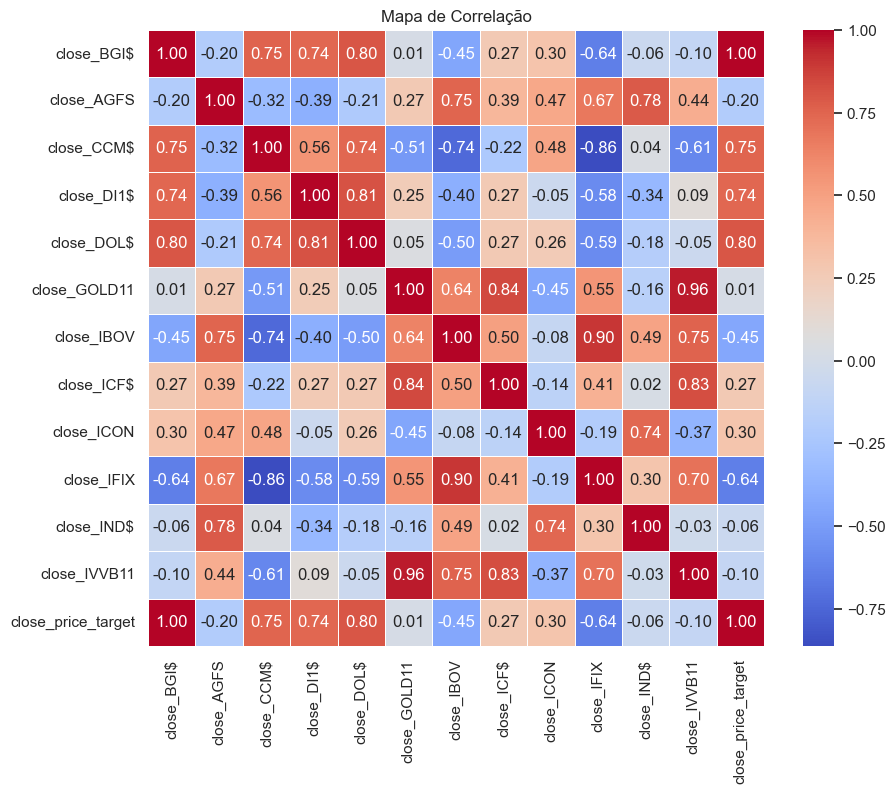

In [255]:
plot_correlation_matrix(df_scaled)

In [281]:
close_columns = [
    'close_AGFS', 'close_BGI$', 'close_CCM$', 'close_DI1$', 'close_DOL$', 
    'close_GOLD11', 'close_IBOV', 'close_ICF$', 'close_ICON', 'close_IFIX', 
    'close_IND$', 'close_IVVB11'
]

tick_volume_columns = ['close_BGI$',
    'tick_volume_AGFS', 'tick_volume_BGI$', 'tick_volume_CCM$', 'tick_volume_DI1$', 
    'tick_volume_DOL$', 'tick_volume_GOLD11', 'tick_volume_IBOV', 'tick_volume_ICF$', 
    'tick_volume_ICON', 'tick_volume_IFIX', 'tick_volume_IND$', 'tick_volume_IVVB11'
]


bgi_indicators_columns = ['close_BGI$', 'open_BGI$', 'high_BGI$', 'low_BGI$',
    'OBV_BGI$', 'RSI_BGI$', 'ATR_BGI$', 'VWAP_BGI$', 
    'EMA9_BGI$', 'EMA21_BGI$', 'EMA55_BGI$'
]

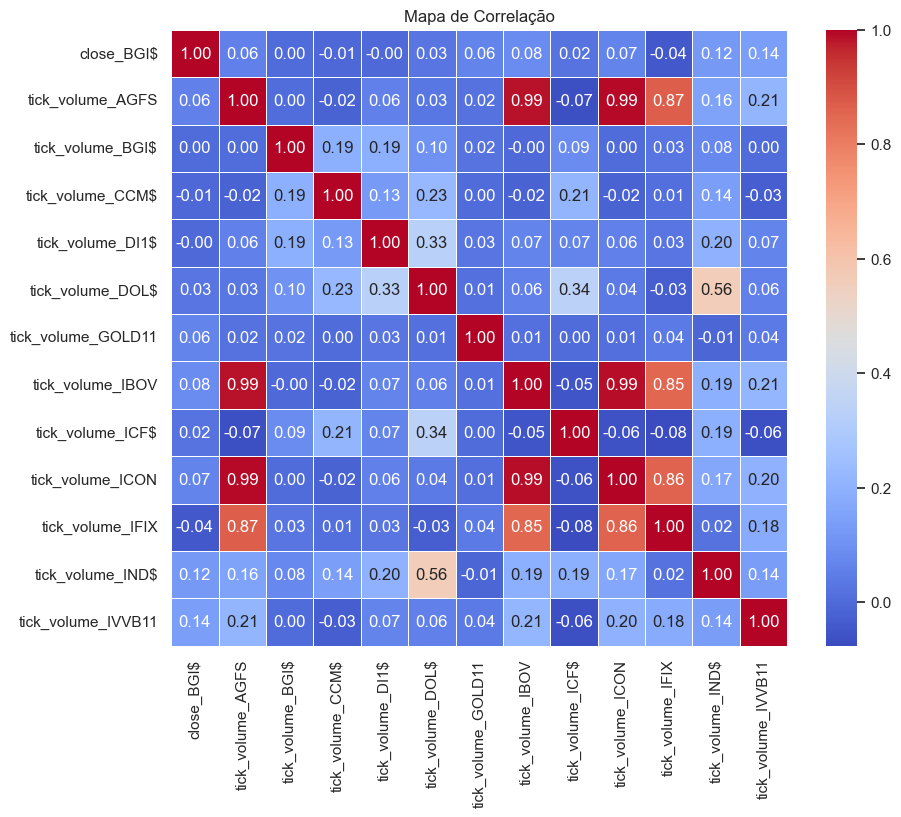

In [276]:
plot_correlation_matrix(df_features[tick_volume_columns])

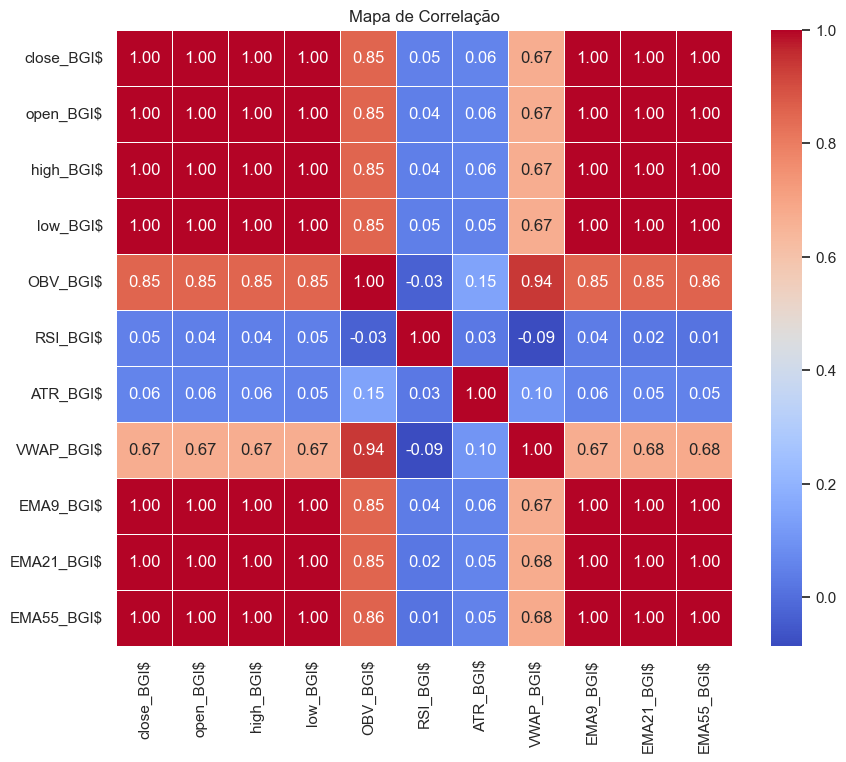

In [282]:
plot_correlation_matrix(df_features[bgi_indicators_columns])

In [61]:
import joblib
import pandas as pd
from optuna.importance import get_param_importances

study = joblib.load('C:\\Users\\guitz\OneDrive\\Área de Trabalho\\monografia\hyperparameters\\daily\\LSTM_look_back_15_look_forward_1_open_price_target\\LSTM_look_back_15_look_forward_1_open_price_target_study.pkl')

# # Extraindo as importâncias dos parâmetros
# importances = study.get_param_importances()

# # Convertendo as importâncias para um DataFrame
# importances_df = pd.DataFrame(list(importances.items()), columns=['Parameter', 'Importance'])

# # Exibindo o DataFrame com as importâncias
# print(importances_df)

# # Salvando o DataFrame em um arquivo CSV, caso necessário
# importances_df.to_csv("param_importances.csv", index=False)

In [ ]:
# # Extraindo as importâncias dos parâmetros
importances = study.get_param_importances()


In [ ]:
study.study_name

In [64]:
importances = get_param_importances(study)


In [ ]:
importances